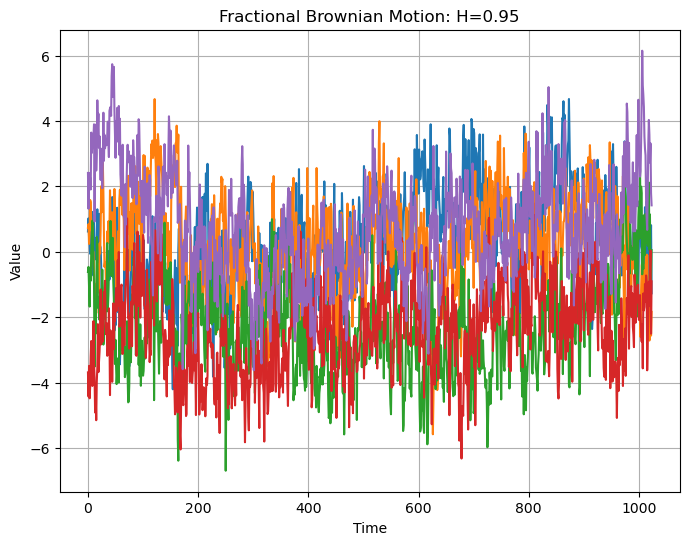

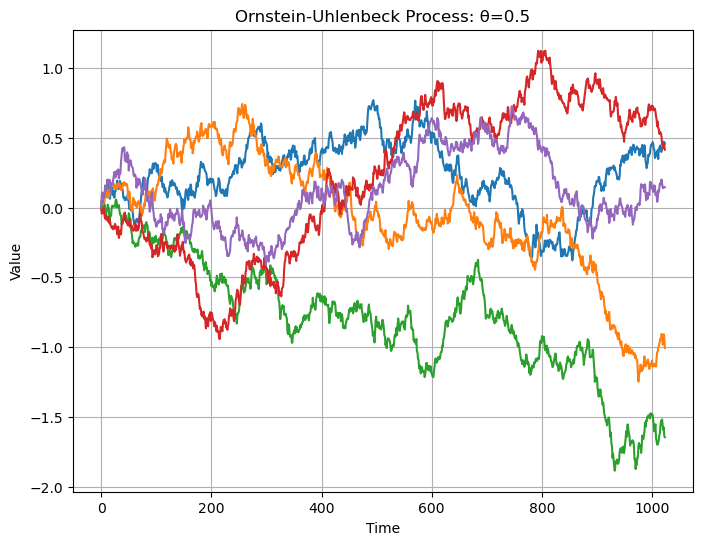

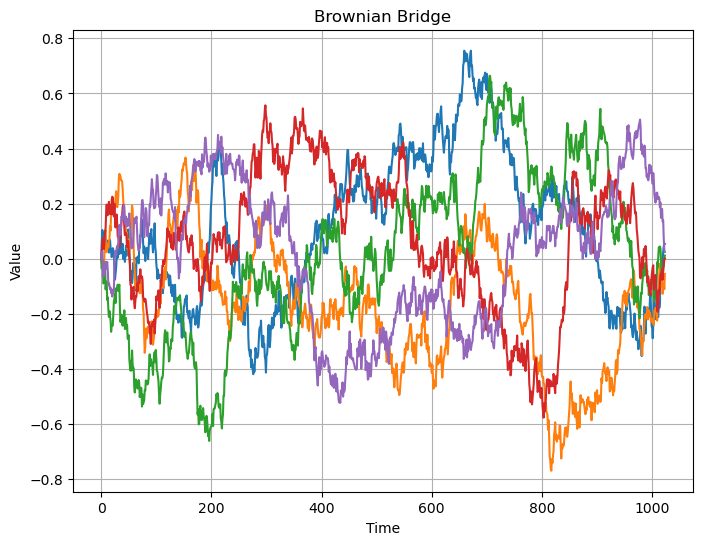

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# def fractional_brownian_motion(H, T, N):
#     """Generate a fractional Brownian motion time series."""
#     dt = T / N
#     t = np.linspace(0, T, N)
#     cov = np.zeros((N, N))
#     for i in range(N):
#         for j in range(N):
#             cov[i, j] = 0.5 * (t[i]**(2*H) + t[j]**(2*H) - abs(t[i] - t[j])**(2*H))
#     L = np.linalg.cholesky(cov + 1e-10 * np.eye(N))  # Add small value for numerical stability
#     Z = np.random.normal(size=N)
#     B_H = L @ Z
#     return B_H

# def ornstein_uhlenbeck(theta, mu, sigma, X0, T, N):
#     """Generate an Ornstein-Uhlenbeck process time series."""
#     dt = T / N
#     X = np.zeros(N)
#     X[0] = X0
#     for i in range(1, N):
#         dW = np.random.normal(0, np.sqrt(dt))
#         X[i] = X[i-1] + theta * (mu - X[i-1]) * dt + sigma * dW
#     return X

# def brownian_bridge(T, N):
#     """Generate a Brownian bridge time series."""
#     dt = T / N
#     B = np.zeros(N)
#     for i in range(1, N):
#         dW = np.random.normal(0, np.sqrt(dt))
#         B[i] = B[i-1] + dW
#     # Adjust to create a bridge
#     B -= (np.arange(N) / (N - 1)) * B[-1]
    # return B


# Fractional Brownian Motion: # n - lengh of the series
# Covariance function:
# gamma(k) = sigma^2 * delta^(2H) /0.5 * ((k + 1)^(2H) + |k - 1|^(2H) - 2k^(2H))
# k = 0,1,...,n - 1
# Covariance matrix = [sigma_{ij}] = [gamma(|i - j|)]


#do poprawy
def fractional_brownian_motion_cov_matrix(H, T, N, sigma=1.0, delta=1.0):
    """Generate a fractional Brownian motion covariance matrix.
    
    Args:
        H (float): Hurst exponent (0 < H < 1).
        T (float): Total time.
        N (int): Number of time steps.
        sigma (float): Scale parameter.
        delta (float): Time increment.
        Returns:
        np.ndarray: Covariance matrix of shape (N, N).
    """

    gamma = lambda k: sigma**2 * delta**(2*H) / 0.5 * ((k + 1)**(2*H) + abs(k - 1)**(2*H) - 2 * k**(2*H))

    dt = T / N
    t = np.linspace(0, T, N)
    cov = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            cov[i, j] = gamma(abs(i - j))

    cov += 1e-8 * np.eye(N)
    return cov

def ornstein_uhlenbeck_cov_matrix(theta, sigma, T, N):
    """Generate an Ornstein-Uhlenbeck process covariance matrix.

    Args:
        theta (float): Mean reversion rate.
        sigma (float): Volatility parameter.
        T (float): Total time.
        N (int): Number of time steps.
    Returns:
        np.ndarray: Covariance matrix of shape (N, N).
    """
    dt = T / N

    gamma = lambda i, j: (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * min(i * dt, j * dt))) * np.exp(-theta * abs(i - j) * dt)

    cov = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            cov[i, j] = gamma(i, j)

    cov += 1e-8 * np.eye(N)
    return cov


def brownian_bridge_cov_matrix(T, N):
    """Generate a Brownian bridge covariance matrix.
    
    Args:
        T (float): Total time.
        N (int): Number of time steps.
    Returns:
        np.ndarray: Covariance matrix of shape (N, N).
    """
    dt = T / N

    gamma = lambda i, j: min(i * dt, j * dt) - (i * dt * j * dt) / T

    cov = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            cov[i, j] = gamma(i, j)

    cov += 1e-8 * np.eye(N)
    return cov




def plot_gaussian(paths, name="Fractional Brownian Motion"):
    plt.figure(figsize=(8, 6))
    for path in paths:
        plt.plot(path)
    plt.title(name)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid()
    plt.show()

# Goal: generate X[X_1,...,X_d]^T ~ N(mu, Sigma_x)
#1. Find Cholesky decomposition of Sigma_x: L such that Sigma_x = L * L^T
#2. Generate Z=[Z_1,...,Z_d] ~ N(0, I) (standard normal vector)
#3. Compute X = mu + L * Z

def generate_samples(cov_matrix, mu, N):
        # 1. Find Cholesky decomposition of Sigma_x: L such that Sigma_x = L * L^T and is lower triangular
    L = np.linalg.cholesky(cov_matrix)

    # 2. Generate Z=[Z_1,...,Z_d] ~ N(0, I) (standard normal vector)
    Z = np.random.normal(size=N)

    # 3. Compute X = mu + L * Z
    X = mu + L @ Z

    return X

def generate_and_plot_samples(n_trials=5):

    # N = 2048 # dimension
    N = 1024 # dimension
    T = 1.0 
    H = 0.95
    sigma = 1.0
    # delta = T / N
    delta = 1.0
    theta = 0.5
    # mu_ornstein_uhlenbeck = 0.0

    mu = np.zeros(N)    #

    fbm_paths = []
    for _ in range(n_trials):
        cov_matrix_fbm = fractional_brownian_motion_cov_matrix(H, T, N, sigma, delta)
        fbm_path = generate_samples(cov_matrix_fbm, mu, N)
        fbm_paths.append(fbm_path)

    plot_gaussian(fbm_paths, "Fractional Brownian Motion: H={}".format(H))

    ou_paths = []
    for _ in range(n_trials):
        cov_matrix_ou = ornstein_uhlenbeck_cov_matrix(theta, sigma, T, N)
        ou_path = generate_samples(cov_matrix_ou, mu, N)
        ou_paths.append(ou_path)

    plot_gaussian(ou_paths, "Ornstein-Uhlenbeck Process: θ={}".format(theta))

    bb_paths = []
    for _ in range(n_trials):
        cov_matrix_bb = brownian_bridge_cov_matrix(T, N)

        bb_path = generate_samples(cov_matrix_bb, mu, N)
        bb_paths.append(bb_path)

    plot_gaussian(bb_paths, "Brownian Bridge")
    return

def main():
    # Run the task multiple times to see different samples
    n_trials = 5
    generate_and_plot_samples(n_trials)

# def main():
#     # Example covariance matrix
#     cov_matrix = np.array([[4, 2], [2, 3]])
    
#     # Perform Cholesky decomposition
#     L = np.linalg.cholesky(cov_matrix)

#     print("Covariance Matrix:")
#     print(cov_matrix)
#     print("\nCholesky Decomposition (L):")
#     print(L)
#     print("\nReconstructed Covariance Matrix (L @ L.T):")
#     print(L @ L.T)

#     # Generate sample paths
#     H = 0.75  # Hurst exponent
    # T = 1.0   # Total time
    # N = 100   # Number of time steps

    # fbm_path = fractional_brownian_motion(H, T, N)
    # ou_path = ornstein_uhlenbeck(0.5, 0, 1, 0, T, N)
    # bb_path = brownian_brige(T, N)

    # # Plot the sample paths
    # import matplotlib.pyplot as plt

    # plt.figure(figsize=(12, 8))
    # plt.subplot(3, 1, 1)
    # plt.plot(fbm_path)
    # plt.title("Fractional Brownian Motion (H=0.75)")
    # plt.subplot(3, 1, 2)
    # plt.plot(ou_path)
    # plt.title("Ornstein-Uhlenbeck Process")
    # plt.subplot(3, 1, 3)
    # plt.plot(bb_path)
    # plt.title("Brownian Bridge")
    # plt.tight_layout()
    # plt.show()

if __name__ == "__main__":
    main()